### Python'da Pandas ve NumPy Kütüphanelerinin İçe Aktarılması

In [34]:
import pandas as pd
import numpy as np

### CSV Dosyasından Veri Okuma ve Pandas DataFrame Oluşturma

In [35]:
data = pd.read_csv("istanbul_ev_ilanlari(manipüle_edilmis).csv", index_col=0)

### Pandas DataFrame'de Eksik (Null) Değerlerin Sayısını Bulma

In [36]:
data.isnull().sum()

info_          0
location       0
home prices    0
room count     0
m2             0
age            0
floor type     0
dtype: int64

In [37]:
data

,info_,location,home prices,room count,m2,age,floor type
0,Satılık Daire,adalar,6200000,3 + 1,130,26,2. Kat
1,Satılık Daire,adalar,7500000,3 + 1,140,30,Bahçe Katı
2,Satılık Daire,adalar,7980000,5 + 1,160,31,Bahçe Katı
3,Satılık Daire,adalar,6250000,4 + 1,170,20,En Üst Kat
4,Satılık Daire,adalar,4600000,4 + 1,140,40,Bahçe Katı
...,...,...,...,...,...,...,...
43447,Satılık Daire,zeytinburnu,7500000,3 + 1,130,30,8. Kat
43448,Satılık Daire,zeytinburnu,3000000,3 + 2,160,15,3. Kat
43449,Satılık Daire,zeytinburnu,2600000,3 + 1,130,28,12. Kat
43450,Satılık Daire,zeytinburnu,2100000,2 + 1,100,25,2. Kat


### Kategorik Değişkenleri Sayısal Değerlere Dönüştürme (Label Encoding)

In [38]:
data2 = data.copy()

In [39]:
from sklearn.preprocessing import LabelEncoder

le_loc = LabelEncoder()
le_rc = LabelEncoder()
le_ft = LabelEncoder()

data["location"] = le_loc.fit_transform(data["location"])
data["room count"] = le_rc.fit_transform(data["room count"])
data["floor type"] = le_ft.fit_transform(data["floor type"])

In [40]:
data

,info_,location,home prices,room count,m2,age,floor type
0,Satılık Daire,0,6200000,12,130,26,11
1,Satılık Daire,0,7500000,12,140,30,23
2,Satılık Daire,0,7980000,24,160,31,23
3,Satılık Daire,0,6250000,19,170,20,26
4,Satılık Daire,0,4600000,19,140,40,23
...,...,...,...,...,...,...,...
43447,Satılık Daire,38,7500000,12,130,30,19
43448,Satılık Daire,38,3000000,14,160,15,14
43449,Satılık Daire,38,2600000,12,130,28,3
43450,Satılık Daire,38,2100000,6,100,25,11


### Veri Setini Özellikler ve Hedef Değişken Olarak Ayırma ve Eğitim-Test Veri Seti Oluşturma

In [41]:
X = data.drop(["home prices", "info_"], axis=1)
y = np.log(data["home prices"])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

### Scikit-Learn Kütüphanesinden Modül ve Fonksiyonların İçe Aktarılması

In [42]:
from sklearn.model_selection import GridSearchCV ,train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,accuracy_score
from sklearn import model_selection
from sklearn.preprocessing import RobustScaler, StandardScaler

### LinearRegression ile model kurma

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler, StandardScaler

In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Doğrusal Regresyon Modelinin Eğitim Veri Seti Üzerindeki Performansının Değerlendirilmesi

In [45]:
lr.score(X_train, y_train)

0.2047062764111448

### Doğrusal Regresyon Modelinin Test Veri Seti Üzerindeki Performansının Değerlendirilmesi

In [46]:
lr.score(X_test, y_test)

0.2202074732591528

### Doğrusal Regresyon Modeli ile Test Veri Setinde Tahmin Yapma

In [47]:
y_pred_lr = lr.predict(X_test)

### Gerçek ve Tahmin Edilen Değerleri İçeren Pandas DataFrame Oluşturma



In [48]:
frame_lr = pd.DataFrame({"actual":y_test, "predict":y_pred_lr})

### Regresyon Modelinin Performansını Değerlendirme

In [49]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_lr))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lr))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Mean Absolute Error: 0.4621989787388876
Mean Squared Error: 0.3576431438507616
Root Mean Squared Error: 0.5980327280766176


### Tahmin ve Gerçek Değerlerin Karşılaştırılması İçin Çubuk Grafik Oluşturma

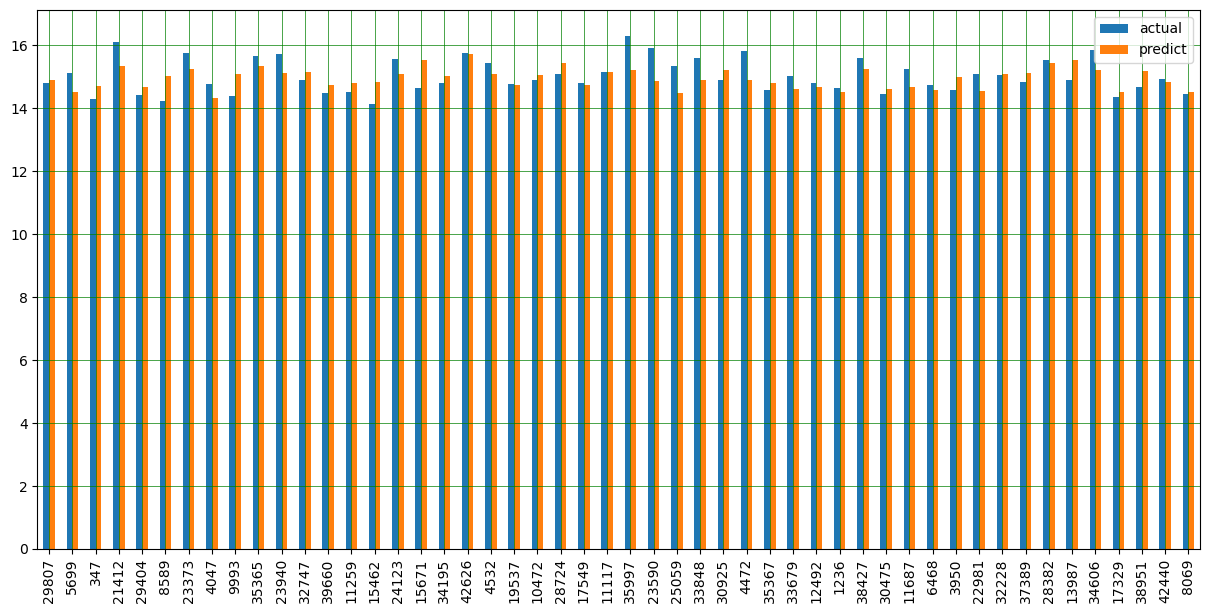

In [50]:
import matplotlib.pyplot as plt
df_temp = frame_lr.head(50)
df_temp.plot(kind='bar',figsize=(15,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Tahmin

In [51]:
location = ["kadikoy"]
room_count = ["5 + 1"]
floor_type = ["3. Kat"]
m2 = [145]
age = [5]
tahmin_yap = pd.DataFrame({"location": le_loc.transform(location)[0],
                           "room count": le_rc.transform(room_count)[0],
                           "m2": m2,
                           "age": age,
                           "floor type": le_ft.transform(floor_type)[0]})

In [52]:
np.exp(lr.predict(tahmin_yap)[0])

4120712.769209154

In [70]:
import ipywidgets as widgets
from IPython.display import display
location_widget = widgets.Dropdown(options=data2["location"].unique(), description="Location:")
display(location_widget)
room_count_widget = widgets.Dropdown(options=data2["room count"].unique(), description="Room Count:")
display(room_count_widget)
m2_widget = widgets.IntSlider(min=0, max=300, step=1, description="Square Meters:")
display(m2_widget)
age_widget = widgets.IntSlider(min=0, max=100, step=1, description="Age:")
display(age_widget)
floor_type_widget = widgets.Dropdown(options=data2["floor type"].unique(), description="Floor Type:")
display(floor_type_widget)
def predict_price(b):
    tahmin_yap = pd.DataFrame({"location": le_loc.transform([location_widget.value])[0],
                           "room count": le_rc.transform([room_count_widget.value])[0],
                           "m2": [int(m2_widget.value)],
                           "age": [int(age_widget.value)],
                           "floor type": le_ft.transform([floor_type_widget.value])[0]})
    print("Tahmin Edilen Fiyat: ₺" + str(int(np.exp(lr.predict(tahmin_yap)[0]))))
predict_button = widgets.Button(description="Tahmini Fiyat")
predict_button.on_click(predict_price)
display(predict_button)

Dropdown(description='Location:', options=('adalar', 'arnavutkoy', 'atasehir', 'avcilar', 'bagcilar', 'bahceli…

Dropdown(description='Room Count:', options=('3 + 1', '5 + 1', '4 + 1', '3 + 2', '1 + 1', '2 + 1', '4 + 2', '2…

IntSlider(value=0, description='Square Meters:', max=300)

IntSlider(value=0, description='Age:')

Dropdown(description='Floor Type:', options=('2. Kat', 'Bahçe Katı', 'En Üst Kat', 'Ara Kat', '3. Kat', '1. Ka…

Button(description='Tahmini Fiyat', style=ButtonStyle())

Tahmin Edilen Fiyat: ₺4622972


### RandomForestRegressor ile model kurma

In [73]:
from sklearn.ensemble import RandomForestRegressor

### Rastgele Orman Regresyon Modelinin Oluşturulması ve Eğitilmesi

In [74]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

### Rastgele Orman Regresyon Modelinin Test Veri Seti Üzerindeki Performansının Değerlendirilmesi

In [52]:
rfr.score(X_test, y_test)

0.6403637645559015

### Rastgele Orman Regresyon Modelinin Eğitim Veri Seti Üzerindeki Performansının Değerlendirilmesi

In [53]:
rfr.score(X_train, y_train)

0.9151832561167113

### Doğrusal Regresyon Modeli ile Test Veri Setinde Tahmin Yapma

In [54]:
y_pred_rfr = rfr.predict(X_test)

### Gerçek ve Tahmin Edilen Değerleri İçeren Pandas DataFrame Oluşturma



In [55]:
frame_rfr=pd.DataFrame({"actual":y_test, "predict":y_pred_rfr})

### Regresyon Modelinin Performansını Değerlendirme

In [56]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_rfr))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_rfr))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_rfr)))

Mean Absolute Error: 0.24635557433900865
Mean Squared Error: 0.1649431476657708
Root Mean Squared Error: 0.4061319338167966


### Rastgele Orman Modeli ile Özellik Önem Derecelendirmesi

In [57]:
importance=pd.DataFrame({"importance":rfr.feature_importances_},index= X_train.columns)
importance

,importance
location,0.366444
room count,0.044167
m2,0.295632
age,0.159276
floor type,0.134481


### Özellik Önem Derecelendirmesi Üzerinde Pasta Grafiği Oluşturma

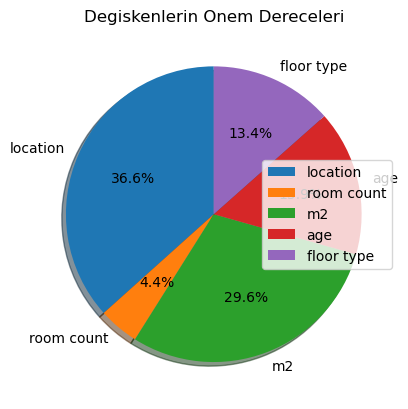

In [58]:
import matplotlib.pyplot as plt
plt.pie(importance["importance"], labels=X_train.columns,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Degiskenlerin Onem Dereceleri")
plt.legend(X_train.columns , loc=5)

### Tahmin ve Gerçek Değerlerin Karşılaştırılması İçin Çubuk Grafik Oluşturma

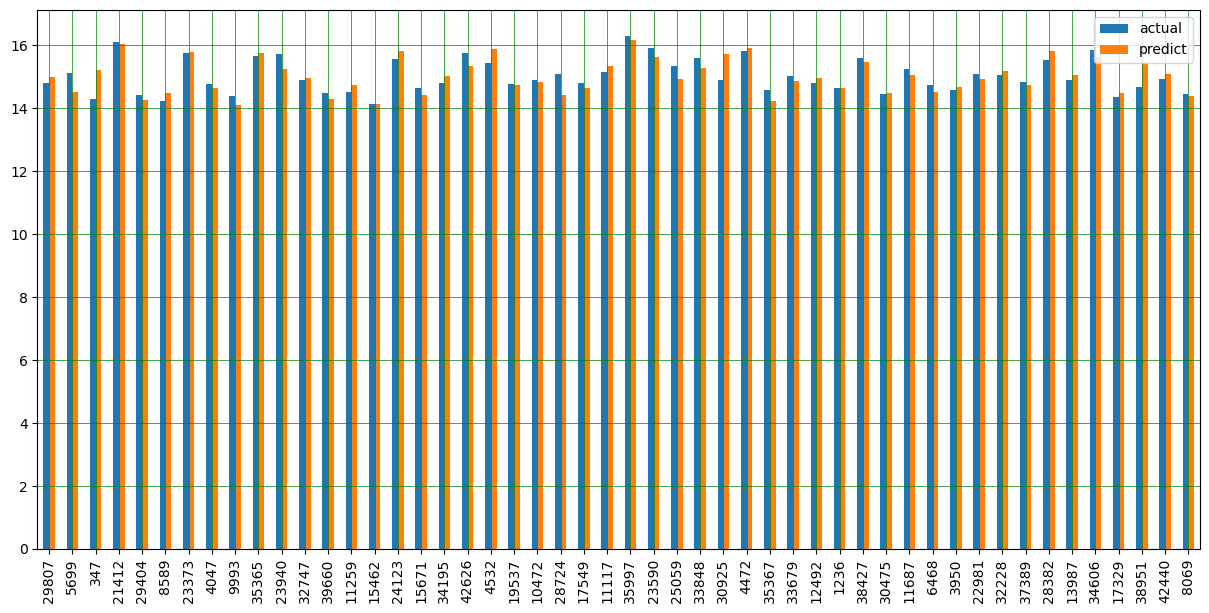

In [59]:
df_temp = frame_rfr.head(50)
df_temp.plot(kind='bar',figsize=(15,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()



## tahmin etme

In [68]:
location = ["kadikoy"]
room_count = ["4 + 1"]
floor_type = ["2. Kat"]
m2 = [145]
age = [5]
tahmin_yap = pd.DataFrame({"location": le_loc.transform(location)[0],
                           "room count": le_rc.transform(room_count)[0],
                           "m2": m2,
                           "age": age,
                           "floor type": le_ft.transform(floor_type)[0]})


In [69]:
np.exp(rfr.predict(tahmin_yap)[0])

9816271.362278655

In [75]:
import ipywidgets as widgets
from IPython.display import display
location_widget = widgets.Dropdown(options=data2["location"].unique(), description="Location:")
display(location_widget)
room_count_widget = widgets.Dropdown(options=data2["room count"].unique(), description="Room Count:")
display(room_count_widget)
m2_widget = widgets.IntSlider(min=0, max=300, step=1, description="Square Meters:")
display(m2_widget)
age_widget = widgets.IntSlider(min=0, max=100, step=1, description="Age:")
display(age_widget)
floor_type_widget = widgets.Dropdown(options=data2["floor type"].unique(), description="Floor Type:")
display(floor_type_widget)
def predict_price(b):
    tahmin_yap = pd.DataFrame({"location": le_loc.transform([location_widget.value])[0],
                           "room count": le_rc.transform([room_count_widget.value])[0],
                           "m2": [int(m2_widget.value)],
                           "age": [int(age_widget.value)],
                           "floor type": le_ft.transform([floor_type_widget.value])[0]})
    print("Tahmin Edilen Fiyat: ₺" + str(int(np.exp(rfr.predict(tahmin_yap)[0]))))
predict_button = widgets.Button(description="Tahmini Fiyat")
predict_button.on_click(predict_price)
display(predict_button)

Dropdown(description='Location:', options=('adalar', 'arnavutkoy', 'atasehir', 'avcilar', 'bagcilar', 'bahceli…

Dropdown(description='Room Count:', options=('3 + 1', '5 + 1', '4 + 1', '3 + 2', '1 + 1', '2 + 1', '4 + 2', '2…

IntSlider(value=0, description='Square Meters:', max=300)

IntSlider(value=0, description='Age:')

Dropdown(description='Floor Type:', options=('2. Kat', 'Bahçe Katı', 'En Üst Kat', 'Ara Kat', '3. Kat', '1. Ka…

Button(description='Tahmini Fiyat', style=ButtonStyle())

Tahmin Edilen Fiyat: ₺2963610


### XGBoost ile model kurma

In [18]:
import xgboost as xgb
from xgboost import XGBRegressor


### XGBoost Regresyon Modelinin Oluşturulması ve Eğitilmesi

In [19]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### XGBoost Regresyon Modelinin Test Veri Seti Üzerindeki Performansının Değerlendirilmesi

In [20]:
xgb.score(X_test, y_test)

0.6819311368410165

### XGBoost Regresyon Modelinin Eğitim Veri Seti Üzerindeki Performansının Değerlendirilmesi

In [21]:
xgb.score(X_train, y_train)

0.739885422226982

### XGBoost Regresyon Modeli ile Test Veri Setinde Tahmin Yapma

In [22]:
y_pred_xgb = xgb.predict(X_test)

### Gerçek ve Tahmin Edilen Değerleri İçeren Pandas DataFrame Oluşturma

In [23]:
frame_xgb=pd.DataFrame({"actual":y_test, "predict":y_pred_xgb})

### XGBoost Modelinin Performansını Değerlendirme 

In [24]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_xgb))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_xgb))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

Mean Absolute Error: 0.24588539773558604
Mean Squared Error: 0.14587873604875087
Root Mean Squared Error: 0.38194074939544076


### XGBoost Regresyon Modeli ile Özellik Önem Derecelendirmesi

In [25]:
importance=pd.DataFrame({"importance":xgb.feature_importances_},index= X_train.columns)
importance

,importance
location,0.340866
room count,0.168386
m2,0.287557
age,0.107920
floor type,0.095271


### Özellik Önem Derecelendirmesi Üzerinde Pasta Grafiği Oluşturma

Text(0.5, 1.0, 'Degiskenlerin Onem Dereceleri')

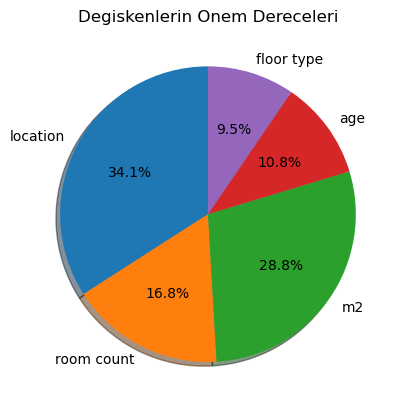

In [76]:
import matplotlib.pyplot as plt
plt.pie(importance["importance"], labels=X_train.columns,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Degiskenlerin Onem Dereceleri")

### Tahmin ve Gerçek Değerlerin Karşılaştırılması İçin Çubuk Grafik Oluşturma (XGBoost)

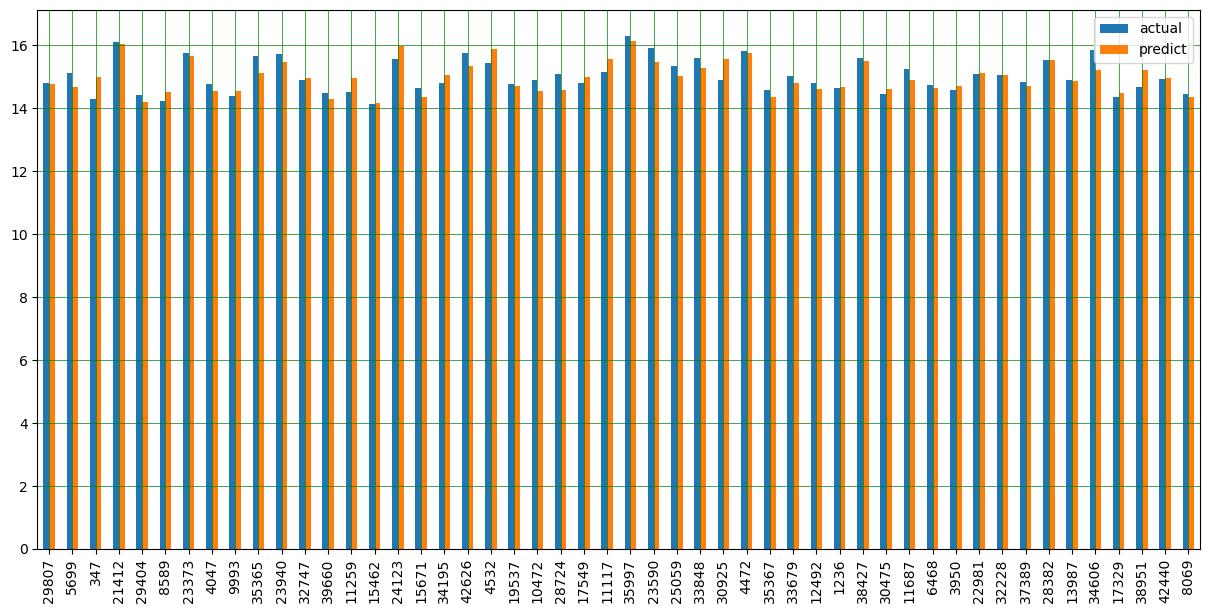

In [27]:
df_temp = frame_xgb.head(50)
df_temp.plot(kind='bar',figsize=(15,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Tahmin Etme

In [28]:
location = ["kadikoy"]
room_count = ["2 + 1"]
floor_type = ["2. Kat"]
m2 = [145]
age = [5]
tahmin_yap = pd.DataFrame({"location": le_loc.transform(location)[0],
                           "room count": le_rc.transform(room_count)[0],
                           "m2": m2,
                           "age": age,
                           "floor type": le_ft.transform(floor_type)[0]})


In [29]:
np.exp(xgb.predict(tahmin_yap)[0])

10071933.0

In [77]:
import ipywidgets as widgets
from IPython.display import display
location_widget = widgets.Dropdown(options=data2["location"].unique(), description="Location:")
display(location_widget)
room_count_widget = widgets.Dropdown(options=data2["room count"].unique(), description="Room Count:")
display(room_count_widget)
m2_widget = widgets.IntSlider(min=0, max=300, step=1, description="Square Meters:")
display(m2_widget)
age_widget = widgets.IntSlider(min=0, max=100, step=1, description="Age:")
display(age_widget)
floor_type_widget = widgets.Dropdown(options=data2["floor type"].unique(), description="Floor Type:")
display(floor_type_widget)
def predict_price(b):
    tahmin_yap = pd.DataFrame({"location": le_loc.transform([location_widget.value])[0],
                           "room count": le_rc.transform([room_count_widget.value])[0],
                           "m2": [int(m2_widget.value)],
                           "age": [int(age_widget.value)],
                           "floor type": le_ft.transform([floor_type_widget.value])[0]})
    print("Tahmin Edilen Fiyat: ₺" + str(int(np.exp(xgb.predict(tahmin_yap)[0]))))
predict_button = widgets.Button(description="Tahmini Fiyat")
predict_button.on_click(predict_price)
display(predict_button)

Dropdown(description='Location:', options=('adalar', 'arnavutkoy', 'atasehir', 'avcilar', 'bagcilar', 'bahceli…

Dropdown(description='Room Count:', options=('3 + 1', '5 + 1', '4 + 1', '3 + 2', '1 + 1', '2 + 1', '4 + 2', '2…

IntSlider(value=0, description='Square Meters:', max=300)

IntSlider(value=0, description='Age:')

Dropdown(description='Floor Type:', options=('2. Kat', 'Bahçe Katı', 'En Üst Kat', 'Ara Kat', '3. Kat', '1. Ka…

Button(description='Tahmini Fiyat', style=ButtonStyle())

Tahmin Edilen Fiyat: ₺3406285
